In [6]:
library(dplyr)
library(ggplot2)

In [8]:
setwd("C:/Users/Aeint Thet Ngon/Documents/Portfolio/Capital Bikeshare/2016")

In [10]:
files=list.files(pattern="*.csv")
names=c("q1", "q2", "q3a","q3b", "q4")

for (i in 1:length(files)){
  assign(names[i], read.csv(files[i]))
}

colnames(q2)[9] <- "Member.Type"

In [12]:
quarter="q1"
q1 <- cbind(q1, quarter)
quarter="q2"
q2 <- cbind(q2, quarter)
quarter="q3"
q3a <- cbind(q3a, quarter)
quarter="q3"
q3b <- cbind(q3b, quarter)
quarter="q4"
q4 <- cbind(q4, quarter)

In [14]:
trips16 <- rbind(q1, q2, q3a, q3b, q4)

trips16 <- trips16 %>%
  mutate(startDT=as.POSIXct(strptime(trips16$Start.date, "%m/%d/%Y %H:%M")),
         endDT=as.POSIXct(strptime(trips16$End.date, "%m/%d/%Y %H:%M")))

rm(q1, q2, q3a, q3b, q4)

head(trips16)

Duration..ms.,Start.date,End.date,Start.station.number,Start.station,End.station.number,End.station,Bike.number,Member.Type,quarter,startDT,endDT
301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:04:00
557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,q1,2016-03-31 23:59:00,2016-04-01 00:08:00
766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,q1,2016-03-31 23:57:00,2016-04-01 00:09:00
139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,q1,2016-03-31 23:57:00,2016-03-31 23:59:00
967713,3/31/2016 23:57,4/1/2016 0:13,31266,11th & M St NW,31600,5th & K St NW,W20562,Casual,q1,2016-03-31 23:57:00,2016-04-01 00:13:00


In [16]:
setwd("C:/Users/Aeint Thet Ngon/Documents/Portfolio/Capital Bikeshare/2015")

In [17]:
files=list.files(pattern="*.csv")
names=c("q1", "q2", "q3", "q4")

for (i in 1:length(files)){
  assign(names[i], read.csv(files[i]))
}
quarter="q1"
q1 <- cbind(q1, quarter)
quarter="q2"
q2 <- cbind(q2, quarter)
quarter="q3"
q3 <- cbind(q3, quarter)
quarter="q4"
q4 <- cbind(q4, quarter)
#colnames(q2)[9] <- "Member.Type"

In [18]:
s_temp <- data.frame(Start.station=q3$Start.station, Start.station.number=q3$Start.station.number)
e_temp <- data.frame(End.station=q3$End.station,End.station.number=q3$End.station.number)

In [19]:
s_temp <- unique(s_temp)
e_temp <- unique(e_temp)
head(e_temp)

,End.station,End.station.number
1,15th & Euclid St NW,31117
2,Jefferson Dr & 14th St SW,31247
4,Park Rd & Holmead Pl NW,31602
5,3rd St & Pennsylvania Ave SE,31269
6,M St & New Jersey Ave SE,31208
7,13th St & New York Ave NW,31227


In [20]:
q1 <- left_join(q1, s_temp, by="Start.station")
q1 <- left_join(q1, e_temp, by="End.station")

head(q1)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factors with different levels, coercing to character vector"Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factors with different levels, coercing to character vector"

Total.duration..ms.,Start.date,Start.station,End.date,End.station,Bike.number,Subscription.Type,quarter,Start.station.number,End.station.number
2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual,q1,31271,31254
2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual,q1,31271,31254
468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered,q1,31204,31234
348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered,q1,31602,31117
980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual,q1,31247,31241
932411,1/1/2015 0:10,Jefferson Dr & 14th St SW,1/1/2015 0:26,Thomas Circle,W01126,Casual,q1,31247,31241


In [21]:
q2 <- left_join(q2, s_temp, by="Start.station")
q2 <- left_join(q2, e_temp, by="End.station")

head(q2)

Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factors with different levels, coercing to character vector"Warning message in left_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
"joining factors with different levels, coercing to character vector"

Duration..ms.,Start.date,Start.station,End.date,End.station,Bike.number,Subscription.type,quarter,Start.station.number,End.station.number
1761773,6/30/2015 23:58,17th St & Massachusetts Ave NW,7/1/2015 0:27,USDA / 12th & Independence Ave SW,W21320,Casual,q2,31267,31217
193188,6/30/2015 23:58,5th & K St NW,7/1/2015 0:01,3rd & H St NW,W20832,Member,q2,31600,31604
2895041,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:45,Jefferson Dr & 14th St SW,W21519,Casual,q2,31247,31247
2845488,6/30/2015 23:57,Jefferson Dr & 14th St SW,7/1/2015 0:44,Jefferson Dr & 14th St SW,W00335,Casual,q2,31247,31247
1130426,6/30/2015 23:57,Park Rd & Holmead Pl NW,7/1/2015 0:16,1st & Rhode Island Ave NW,W20576,Member,q2,31602,31506
684472,6/30/2015 23:57,11th & S St NW,7/1/2015 0:08,1st & M St NE,W21338,Member,q2,31280,31603


In [22]:
colnames(q3)[8] <- "Bike.number"
colnames(q4)[8] <- 'Bike.number'
colnames(q1)[1] <- "Duration..ms."
colnames(q1)[7] <- "Member.type"
colnames(q2)[7] <- "Member.type"
trips15 <- rbind(q1, q2, q3, q4)

In [23]:
trips15 <- trips15 %>%
  mutate(startDT=as.POSIXct(strptime(trips15$Start.date, "%m/%d/%Y %H:%M")),
         endDT=as.POSIXct(strptime(trips15$End.date, "%m/%d/%Y %H:%M")))

rm(q1, q2, q3, q4)

head(trips15)

Duration..ms.,Start.date,Start.station,End.date,End.station,Bike.number,Member.type,quarter,Start.station.number,End.station.number,startDT,endDT
2394764,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W00612,Casual,q1,31271,31254,2015-01-01 00:02:00,2015-01-01 00:42:00
2389161,1/1/2015 0:02,Constitution Ave & 2nd St NW/DOL,1/1/2015 0:42,15th & K St NW,W01140,Casual,q1,31271,31254,2015-01-01 00:02:00,2015-01-01 00:42:00
468047,1/1/2015 0:04,20th & E St NW,1/1/2015 0:12,20th & O St NW / Dupont South,W01226,Registered,q1,31204,31234,2015-01-01 00:04:00,2015-01-01 00:12:00
348068,1/1/2015 0:07,Park Rd & Holmead Pl NW,1/1/2015 0:13,15th & Euclid St NW,W20216,Registered,q1,31602,31117,2015-01-01 00:07:00,2015-01-01 00:13:00
980844,1/1/2015 0:09,Jefferson Dr & 14th St SW,1/1/2015 0:25,Thomas Circle,W21005,Casual,q1,31247,31241,2015-01-01 00:09:00,2015-01-01 00:25:00
932411,1/1/2015 0:10,Jefferson Dr & 14th St SW,1/1/2015 0:26,Thomas Circle,W01126,Casual,q1,31247,31241,2015-01-01 00:10:00,2015-01-01 00:26:00


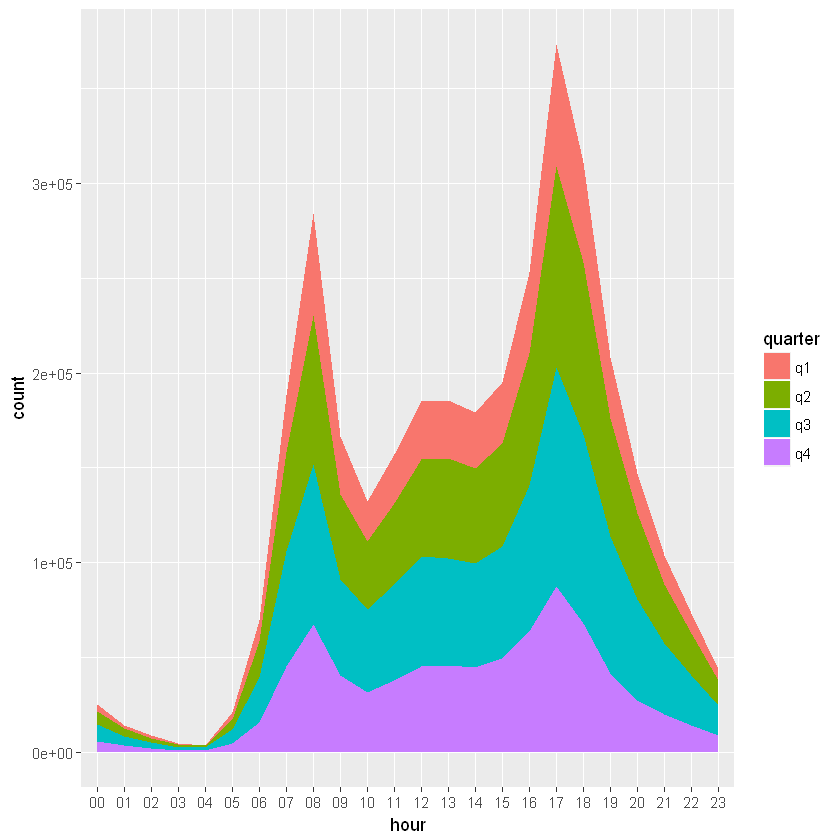

In [24]:
t_start <- trips16 %>% 
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, quarter) %>% mutate(count=n()) %>% select(quarter, hour, count) %>% unique()
#t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(t_start, aes(x=hour,y=count,group=quarter,fill=quarter)) + geom_area()

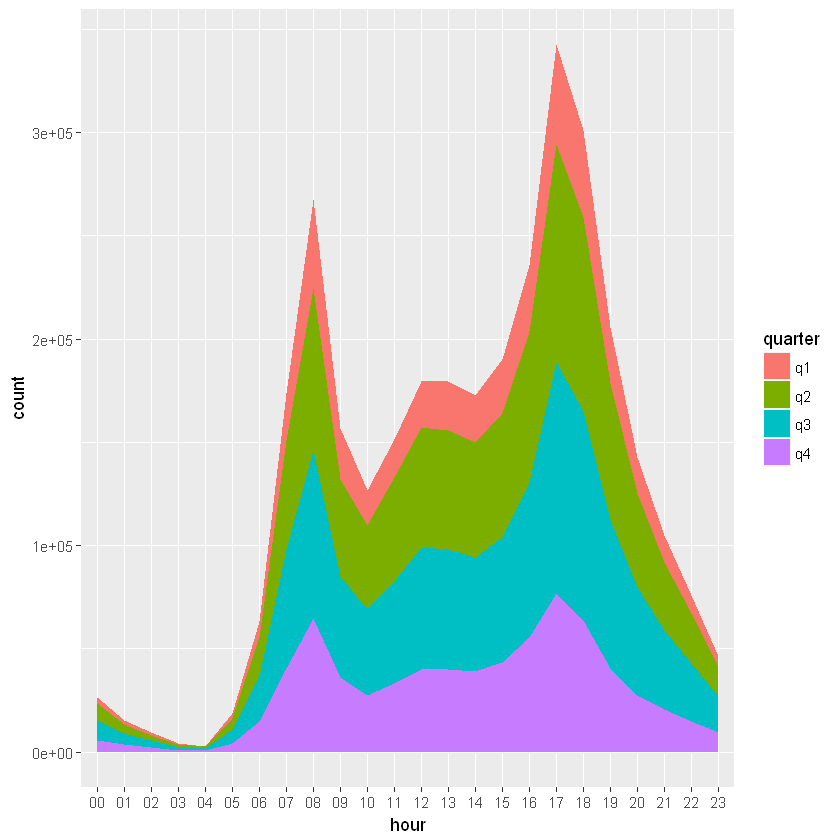

In [25]:
t_start <- trips15 %>% 
  mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(hour, quarter) %>% mutate(count=n()) %>% select(quarter, hour, count) %>% unique()
#t_start$wday <- factor(t_start$wday, levels= c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
#head(t_start)
#t_start <- t_start[order(t_start$wday), ]
ggplot(t_start, aes(x=hour,y=count,group=quarter,fill=quarter)) + geom_area()

In [26]:
t15 <- trips15 %>% mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(Start.station.number,hour,wday, quarter) %>% mutate(count=n()) %>% 
select(Start.station.number,wday, quarter, hour, count) %>% unique()

In [27]:
head(t15)

Start.station.number,wday,quarter,hour,count
31271,Thursday,q1,00,2
31204,Thursday,q1,00,2
31602,Thursday,q1,00,6
31247,Thursday,q1,00,5
31222,Thursday,q1,00,5
31017,Thursday,q1,00,4


In [28]:
t16 <- trips16 %>% mutate(wday=weekdays(startDT), hour=strftime(startDT, "%H")) %>% 
  group_by(Start.station.number,hour,wday, quarter) %>% mutate(count=n()) %>% 
select(Start.station.number,wday, quarter, hour, count) %>% unique()

In [29]:
head(t16)

Start.station.number,wday,quarter,hour,count
31280,Thursday,q1,23,7
31275,Thursday,q1,23,14
31101,Thursday,q1,23,25
31226,Thursday,q1,23,2
31011,Thursday,q1,23,2
31266,Thursday,q1,23,7


In [30]:
lapply(t16, class)

$Start.station.number
[1] "integer"

$wday
[1] "character"

$quarter
[1] "factor"

$hour
[1] "character"

$count
[1] "integer"

In [31]:
t15=transform(t15, wday=as.factor(wday), quarter=as.factor(quarter), hour=as.integer(hour))
t16=transform(t16, wday=as.factor(wday), quarter=as.factor(quarter), hour=as.integer(hour))

In [32]:
regfit=glm(count~wday+hour+quarter, data=t15)

In [38]:
t16$predicted=predict(regfit, t16)

In [39]:
mean((t16$count-t16$predicted)^2)

[1] 822.0577

In [40]:
head(t16)

Start.station.number,wday,quarter,hour,count,predicted
31280,Thursday,q1,23,7,18.31036
31275,Thursday,q1,23,14,18.31036
31101,Thursday,q1,23,25,18.31036
31226,Thursday,q1,23,2,18.31036
31011,Thursday,q1,23,2,18.31036
31266,Thursday,q1,23,7,18.31036


In [41]:
summary(regfit)


Call:
glm(formula = count ~ wday + hour + quarter, data = t15)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-29.73  -16.30   -9.14    4.13  581.80  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.0299     0.3080  19.577  < 2e-16 ***
wdayMonday     -0.6773     0.2927  -2.314   0.0207 *  
wdaySaturday   -1.3974     0.2920  -4.785 1.71e-06 ***
wdaySunday     -1.3097     0.2927  -4.475 7.65e-06 ***
wdayThursday   -0.4028     0.2915  -1.382   0.1670    
wdayTuesday    -0.2581     0.2929  -0.881   0.3782    
wdayWednesday   0.4477     0.2921   1.533   0.1253    
hour            0.5514     0.0129  42.746  < 2e-16 ***
quarterq2      11.1575     0.2292  48.689  < 2e-16 ***
quarterq3      11.5672     0.2272  50.921  < 2e-16 ***
quarterq4       4.8390     0.2313  20.922  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 979.037)

    Null deviance: 161332

In [43]:
t15$predicted=predict(regfit, t15)

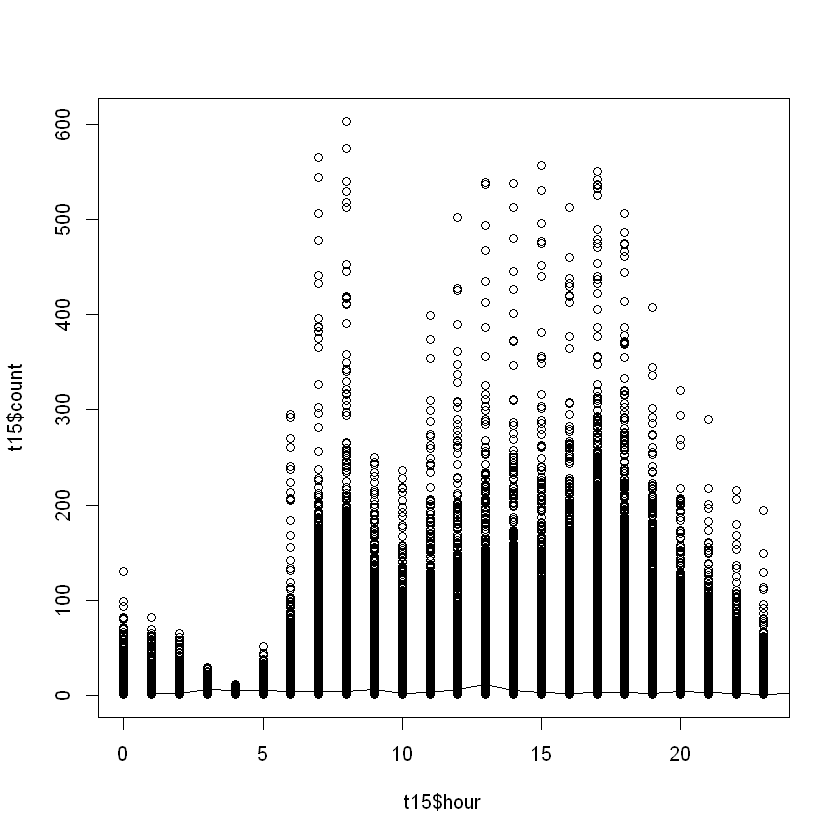

In [47]:
plot(t15$hour, t15$count)
lines(t15$count)